<a href="https://colab.research.google.com/github/tjtyler/MachLearn_HAC_Kmeans/blob/main/lab_5_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Clustering Lab





In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.base import ClusterMixin
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy.random import default_rng

In [ ]:
# pip install ipdb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# --------- DEBUG STUFF FOR PRINT FUNCTION ------------- #
k = 3
X = np.random.rand(20,5)
print('X:\n', X)
labels = np.array([0,0,1,2,1])
for i in range(k):
  clus_i_indcs = np.where(labels==i)
  print('clus_i_indcs:\n',clus_i_indcs[0])
  pnts_in_clus_i = X[clus_i_indcs[0],:]
  print('pnts_in_clus_i:\n', pnts_in_clus_i)
  centroid_i = np.mean(pnts_in_clus_i, axis=0)
  print('centroid_i:\n', centroid_i)


## 1. (50%) Implement the k-means clustering algorithm and the HAC (Hierarchical Agglomerative Clustering) algorithm.

### 1.1.1 HAC

### Code requirements 
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from n to 1.  To simplify the amount of output you may want to implement a mechanism to specify for which k values actual output will be generated.


---
The output should include the following:
- The number of clusters (k).
- The silhouette score of the full clustering. (You can either write and use your own silhouette_score function (extra credit) or use sklearn's)


For each cluster report include:


- The centroid id.
- The number of instances tied to that centroid. 
---

In [ ]:
from scipy.spatial import distance
import math
# import ipdb; 
class HACClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,link_type='single',dist_type='manhattan'): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            link_type = single or complete. when combining two clusters use complete link or single link
        """
        self.link_type = link_type
        self.k = k
        self.dist_type = dist_type
        self.silhouette_score = None
        
    def fit(self, X, y=None):
      """ Fit the data; In this lab this will make the K clusters :D
      Args:
          X (array-like): A 2D numpy array with the training data
          y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
      Returns:
          self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
      """
      self.clus_labels = np.arange(X.shape[0])
      self.dist_mat = distance.cdist(X, X, metric='euclidean') 
      while len(np.unique(self.clus_labels)) > self.k:
        # ipdb.set_trace()
        min_A_label = None
        min_dist_bssf = math.inf
        min_B_ind = None

        temp_dist = None
        for i in range(len(np.unique(self.clus_labels)) -1):
          A_label = np.unique(self.clus_labels)[i]
          A_ind = np.where(self.clus_labels==A_label)

          for j in range(i+1,len(np.unique(self.clus_labels))):
            B_label = np.unique(self.clus_labels)[j]
            B_ind = np.where(self.clus_labels==B_label)

            AB_dist_mat = self.dist_mat[A_ind][:,B_ind]

            if self.link_type == 'single':
              temp_dist = np.min(AB_dist_mat)
            else:
              temp_dist = np.max(AB_dist_mat)
            if temp_dist < min_dist_bssf:
              min_dist_bssf = temp_dist
              min_A_label = A_label
              min_B_ind= B_ind

        self.clus_labels[min_B_ind] = min_A_label

      self.silhouette_score = silhouette_score(X, self.clus_labels)
      return self

    def init_clusters(self,X):
      clusters = []
      for i in range(X.shape[0]):
        clusters.append([i])
      return clusters
    
    def print_clusters(self,X):
        """
            Used for grading.
            print("Num clusters: {:d}\n".format(k))
            print("Silhouette score: {:.4f}\n\n".format(silhouette_score))
            for each cluster and centroid:
                print(np.array2string(centroid,precision=4,separator=","))
                print("{:d}\n".format(size of cluster))
        """
        print("Num clusters: {:d}\n".format(self.k))
        print("Silhouette score: {:.4f}\n\n".format(self.silhouette_score))
        i = 0
        for unique_val in np.unique(self.clus_labels):
          clus_i_indices = np.where(self.clus_labels==unique_val)[0]
          pnts_in_clus_i = X[clus_i_indices,:]
          centroid_i = np.mean(pnts_in_clus_i,axis=0)
          print(f'centroid of cluster {i}:')
          print(np.array2string(centroid_i,precision=4,separator=","))
          print("size of cluster: {:d}\n".format(pnts_in_clus_i.shape[0]))

          i += 1

### 1.1.2 Debug 

Debug your model by running it on the [Debug Abalone Dataset](https://byu.instructure.com/courses/14142/files?preview=4735805)


---
The dataset was modified to be a lot smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points should be commented out.


- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values.


---
Solutions in files:

[Debug HAC Single (Silhouette).txt](https://byu.instructure.com/courses/14142/files?preview=4735819)

[Debug HAC Complete (Silhouette).txt](https://byu.instructure.com/courses/14142/files?preview=4735820)

In [ ]:
# Debug Here
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Load data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/abalone.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:].astype(float)
X = MinMaxScaler().fit_transform(X)

hac = HACClustering(k=5,link_type='single',dist_type='euclidean')
hac.fit(X)

hac.print_clusters(X)


Num clusters: 5

Silhouette score: 0.3453


centroid of cluster 0:
[0.599 ,0.5923,0.4915,0.2826,0.2682,0.2921,0.2316,0.3849]
size of cluster: 195

centroid of cluster 1:
[0.9189,0.9438,0.7105,0.7016,0.759 ,0.7222,0.4472,0.8824]
size of cluster: 1

centroid of cluster 2:
[1.    ,0.9831,0.8026,0.8343,0.6575,0.7825,0.9221,0.8824]
size of cluster: 2

centroid of cluster 3:
[1.    ,0.9888,0.7895,1.    ,1.    ,0.8915,0.7186,0.5882]
size of cluster: 1

centroid of cluster 4:
[0.9189,0.9888,0.8684,0.719 ,0.5797,0.7512,0.6432,0.9412]
size of cluster: 1



#Single Link Debug Solution
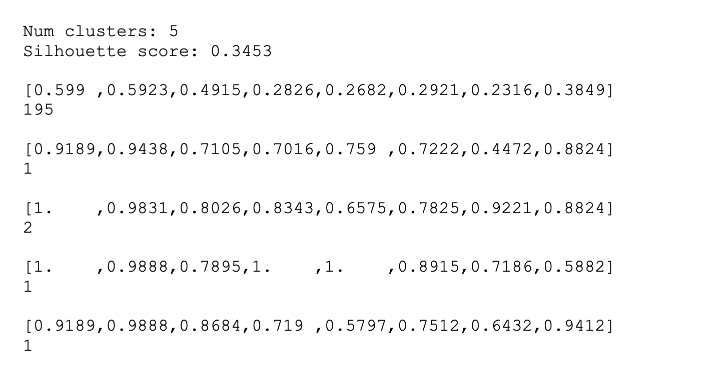

In [ ]:
# Debug Here
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Load data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/abalone.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:].astype(float)
X = MinMaxScaler().fit_transform(X)

hac = HACClustering(k=5,link_type='complete',dist_type='euclidean')
hac.fit(X)

hac.print_clusters(X)

Num clusters: 5

Silhouette score: 0.3095


centroid of cluster 0:
[0.6544,0.649 ,0.5256,0.2879,0.2815,0.3057,0.2288,0.3911]
size of cluster: 71

centroid of cluster 1:
[0.3661,0.3505,0.271 ,0.1008,0.1024,0.1058,0.0836,0.2116]
size of cluster: 67

centroid of cluster 2:
[0.7622,0.7658,0.6759,0.4265,0.4016,0.4536,0.3376,0.5217]
size of cluster: 38

centroid of cluster 3:
[0.8818,0.8904,0.7582,0.614 ,0.5433,0.5317,0.561 ,0.7794]
size of cluster: 16

centroid of cluster 4:
[0.9471,0.934 ,0.8158,0.7457,0.6434,0.7944,0.6457,0.625 ]
size of cluster: 8



#Complete Link Debug Solution
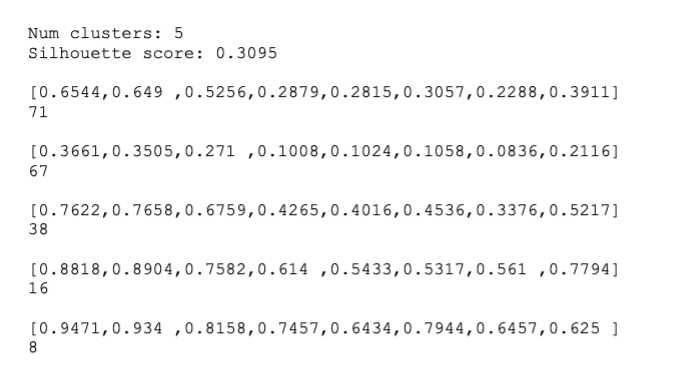

### 1.1.3 Evaluation

We will evaluate your model based on its print_clusters() output using [Evaluation Seismic-bumps_train Dataset](https://byu.instructure.com/courses/14142/files?preview=4735829)

- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values.

#### 1.1.3.1 Complete Link

In [ ]:
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Load evaluation data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/seismic-bumps_train.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:].astype(float)
X = MinMaxScaler().fit_transform(X)

hac = HACClustering(k=5,link_type='complete',dist_type='euclidean')
# Train on evaluation data using complete link
hac.fit(X)
# Print clusters
hac.print_clusters(X)

Num clusters: 5

Silhouette score: 0.2930


centroid of cluster 0:
[0.3636,0.4107,0.5609,0.3857,0.3937,0.2808,0.3155,0.    ]
size of cluster: 49

centroid of cluster 1:
[0.3471,0.3622,0.7897,0.279 ,0.441 ,0.8568,0.2234,0.    ]
size of cluster: 3

centroid of cluster 2:
[0.1656,0.2226,0.3509,0.2328,0.152 ,0.3424,0.1918,0.    ]
size of cluster: 18

centroid of cluster 3:
[0.7918,0.8268,0.606 ,0.7669,0.7787,0.4634,0.7877,1.    ]
size of cluster: 49

centroid of cluster 4:
[0.5326,0.6002,0.4536,0.5531,0.5144,0.5401,0.6266,1.    ]
size of cluster: 21



#### 1.1.3.1 Single Link

In [ ]:
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Load evaluation data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/seismic-bumps_train.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:].astype(float)
X = MinMaxScaler().fit_transform(X)

hac = HACClustering(k=5,link_type='single',dist_type='euclidean')
# Train on evaluation data using single link
hac.fit(X)
# Print clusters
hac.print_clusters(X)

Num clusters: 5

Silhouette score: 0.3971


centroid of cluster 0:
[0.3159,0.3648,0.5145,0.349 ,0.3338,0.3077,0.2868,0.    ]
size of cluster: 67

centroid of cluster 1:
[0.2774,0.2597,1.    ,0.1224,0.4505,0.7549,0.129 ,0.    ]
size of cluster: 1

centroid of cluster 2:
[0.3065,0.3333,0.6979,0.2792,0.3787,1.    ,0.2373,0.    ]
size of cluster: 1

centroid of cluster 3:
[0.0884,0.1818,0.    ,0.145 ,0.1538,0.1245,0.    ,0.    ]
size of cluster: 1

centroid of cluster 4:
[0.714 ,0.7588,0.5603,0.7028,0.6994,0.4864,0.7393,1.    ]
size of cluster: 70



### 1.2.1 K-Means

### Code requirements 
- Ability to choose k and specify k initial centroids
- Use Euclidean Distance as metric
- Ability to handle distance ties
- Include output label as a cluster feature


---
The output should include the following:
- The number of clusters (k).
- The silhouette score of the full clustering. (You can either write and use your own silhouette_score function (extra credit) or use sklearn's)


For each cluster report include:


- The centroid id.
- The number of instances tied to that centroid. 
---
You only need to handle continuous features

In [43]:
import math
class KMEANSClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,debug=False): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
        """
        self.k = k
        self.debug = debug
        self.clus_labels = np.array([math.inf])
        self.epochs_to_converge = 0
        self.silhouette_score = None

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        # NORMALIZE X BEFORE PASSINGIN IT IN  

        initial_centroids = None
        if self.debug:
          initial_centroids = X[:self.k,:].copy() # initial_centroids are the first k instances of X
        else:
          rng = default_rng()
          indxs = rng.choice(X.shape[0], size=self.k, replace=False)
          initial_centroids = X[indxs, :].copy()
          # initial_centroids = np.random.rand(self.k, X.shape[1])

        clus_labels = None
        centroids = initial_centroids
        converged = False
        epochs = 0
        prev_cent = initial_centroids
        while not converged:
    
          dist_mat = distance.cdist(X, centroids, metric='euclidean')
          dist_mat = dist_mat.T # transpose the matrix so that there are k rows and X.shape[0] columns

          clus_labels = [] # entry i in inst_labels is the cluster to which row i of X belongs of the k clusters
          for col in range(dist_mat.shape[1]):
            clus_labels.append(np.argmin(dist_mat[:,col]))
          clus_labels = np.array(clus_labels)
          
          centroids = []
          # compute new centroids
          for i in range(self.k):
            clus_i_indices = np.where(clus_labels==i)[0]
            pnts_in_clus_i = X[clus_i_indices,:]
            centroid_i = np.mean(pnts_in_clus_i, axis=0)
            centroids.append(centroid_i)
          centroids = np.array(centroids)
          
          if np.array_equal(prev_cent, centroids):
            converged = True
            self.epochs_to_converge = epochs

          prev_cent = centroids
          self.clus_labels = clus_labels
          epochs += 1

        self.silhouette_score = silhouette_score(X, self.clus_labels)
        return self
    
    def print_clusters(self,X):
        """
            Used for grading.
            print("Num clusters: {:d}\n".format(k))
            print("Silhouette score: {:.4f}\n\n".format(silhouette_score))
            for each cluster and centroid:
                print(np.array2string(centroid,precision=4,separator=","))
                print("{:d}\n".format(size of cluster))
        """
        print("Num clusters: {:d}\n".format(self.k))
        print('number of epochs/iterations to converge: ', self.epochs_to_converge)
        print("Silhouette score: {:.4f}\n\n".format(silhouette_score(X, self.clus_labels)))
        
        i = 0
        for unique_val in np.unique(self.clus_labels):
          clus_i_indices = np.where(self.clus_labels==unique_val)[0]
          pnts_in_clus_i = X[clus_i_indices,:]
          centroid_i = np.mean(pnts_in_clus_i,axis=0)
          print(f'centroid of cluster {i}:')
          print(np.array2string(centroid_i,precision=4,separator=","))
          print("size of cluster: {:d}\n".format(pnts_in_clus_i.shape[0]))

          i += 1

### 1.2.2 Debug 

Debug your model by running it on the [Debug Abalone Dataset](https://byu.instructure.com/courses/14142/files?preview=4735805)


- Train until convergence
- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use the first k instances as the initial centroids
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values




---
Solutions in files:

[Debug K Means (Silhouette).txt](https://byu.instructure.com/courses/14142/files?preview=4735840)

In [ ]:
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Load debug data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/abalone.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:].astype(float)
X = MinMaxScaler().fit_transform(X)
# Train on debug data
KMeans = KMEANSClustering(k=5,debug=True)
KMeans.fit(X)
# Print clusters
KMeans.print_clusters(X)

Num clusters: 5

number of epochs/iterations to converge:  10
Silhouette score: 0.3845


centroid of cluster 0:
[0.7325,0.7327,0.627 ,0.3817,0.3633,0.4045,0.3046,0.4839]
size of cluster: 75

centroid of cluster 1:
[0.3704,0.3519,0.2686,0.0926,0.0935,0.094 ,0.0792,0.218 ]
size of cluster: 34

centroid of cluster 2:
[0.9035,0.905 ,0.7774,0.6579,0.5767,0.6193,0.5893,0.7279]
size of cluster: 24

centroid of cluster 3:
[0.5692,0.5628,0.4376,0.211 ,0.2113,0.2248,0.1659,0.317 ]
size of cluster: 54

centroid of cluster 4:
[0.1296,0.1037,0.1053,0.0177,0.0211,0.0272,0.0135,0.0724]
size of cluster: 13



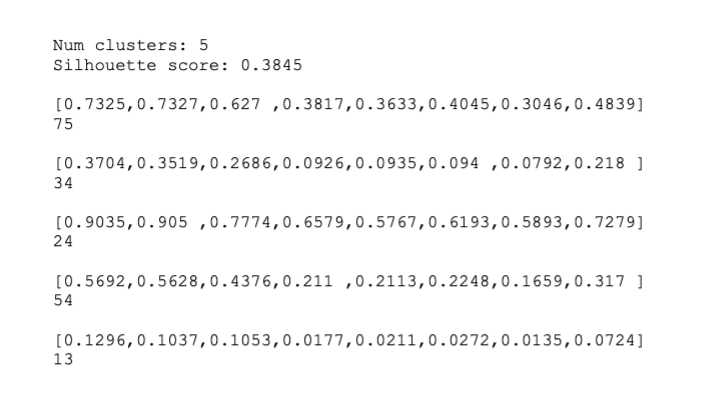

### 1.2.3 Evaluation

We will evaluate your model based on its print_clusters() output using [Evaluation Seismic-bumps_train Dataset](https://byu.instructure.com/courses/14142/files?preview=4735829)
- Train until convergence
- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use the first k instances as the initial centroids
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values

In [ ]:
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Load evaluation data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/seismic-bumps_train.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:].astype(float)
X = MinMaxScaler().fit_transform(X)
# Train on evaluation data
KMeans = KMEANSClustering(k=5,debug=True)
KMeans.fit(X)
# Print clusters
KMeans.print_clusters(X)

Num clusters: 5

number of epochs/iterations to converge:  9
Silhouette score: 0.2769


centroid of cluster 0:
[0.5349,0.6013,0.4617,0.5541,0.5232,0.5544,0.6248,1.    ]
size of cluster: 22

centroid of cluster 1:
[0.3684,0.4338,0.4356,0.4388,0.3573,0.2988,0.3673,0.    ]
size of cluster: 31

centroid of cluster 2:
[0.3658,0.3854,0.7563,0.3093,0.4659,0.3691,0.2413,0.    ]
size of cluster: 20

centroid of cluster 3:
[0.1634,0.2137,0.3968,0.2178,0.1555,0.3078,0.1775,0.    ]
size of cluster: 19

centroid of cluster 4:
[0.7961,0.831 ,0.6054,0.7709,0.7802,0.4553,0.7919,1.    ]
size of cluster: 48



## 2.1.1 (7.5%) Clustering the Iris Classification problem - HAC

Load the Iris Dataset [Iris Dataset](https://byu.instructure.com/courses/14142/files?preview=4421369)

- Use single-link and complete link clustering algorithms
- State whether you normalize your data or not (your choice).  
- Show your results for clusterings using k = 2-7.  
- Graph the silhouette score for each k and discuss your results (i.e. what kind of clusters are being made).
---

Normalized Data: YES

Num clusters: 2

Silhouette score: 0.6295


centroid of cluster 0:
[0.1961,0.5908,0.0786,0.06  ]
size of cluster: 50

centroid of cluster 1:
[0.545 ,0.3633,0.662 ,0.6567]
size of cluster: 100

------------------------------------------------------

Num clusters: 3

Silhouette score: 0.5309


centroid of cluster 0:
[0.199 ,0.6003,0.0792,0.0595]
size of cluster: 49

centroid of cluster 1:
[0.0556,0.125 ,0.0508,0.0833]
size of cluster: 1

centroid of cluster 2:
[0.545 ,0.3633,0.662 ,0.6567]
size of cluster: 100

------------------------------------------------------

Num clusters: 4

Silhouette score: 0.3883


centroid of cluster 0:
[0.199 ,0.6003,0.0792,0.0595]
size of cluster: 49

centroid of cluster 1:
[0.0556,0.125 ,0.0508,0.0833]
size of cluster: 1

centroid of cluster 2:
[0.5363,0.3554,0.6563,0.6531]
size of cluster: 98

centroid of cluster 3:
[0.9722,0.75  ,0.9407,0.8333]
size of cluster: 2

------------------------------------------------------

Num clusters:

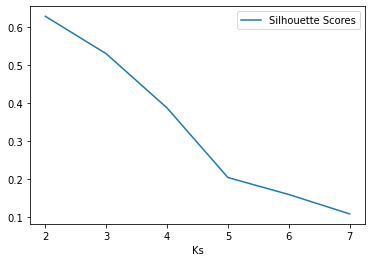

In [ ]:
# Iris Classification using single-link
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# Load evaluation data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/iris.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:-1].astype(float)
X = MinMaxScaler().fit_transform(X)

silhouette_scores = []
ks = []
print('Normalized Data: YES\n')
for i in range(2,8):
  hac = HACClustering(k=i,link_type='single',dist_type='euclidean')
  # Train on evaluation data using single link
  hac.fit(X)
  # Print clusters
  hac.print_clusters(X)
  silhouette_scores.append(hac.silhouette_score)
  ks.append(i)
  print('------------------------------------------------------\n')

dictionary = {'Ks': ks, "Silhouette Scores": silhouette_scores}
df = pd.DataFrame(dictionary)

# Graph classification accuracy over k
df.plot(x ='Ks', y='Silhouette Scores', kind = 'line')

Normalized Data: YES

Num clusters: 2

Silhouette score: 0.3039


centroid of cluster 0:
[0.3436,0.4318,0.367 ,0.3452]
size of cluster: 116

centroid of cluster 1:
[0.719 ,0.4645,0.8106,0.8419]
size of cluster: 34

------------------------------------------------------

Num clusters: 3

Silhouette score: 0.5031


centroid of cluster 0:
[0.1961,0.5908,0.0786,0.06  ]
size of cluster: 50

centroid of cluster 1:
[0.4554,0.3112,0.5855,0.5612]
size of cluster: 66

centroid of cluster 2:
[0.719 ,0.4645,0.8106,0.8419]
size of cluster: 34

------------------------------------------------------

Num clusters: 4

Silhouette score: 0.3932


centroid of cluster 0:
[0.2424,0.6742,0.0827,0.0732]
size of cluster: 33

centroid of cluster 1:
[0.1062,0.4289,0.0708,0.0343]
size of cluster: 17

centroid of cluster 2:
[0.4554,0.3112,0.5855,0.5612]
size of cluster: 66

centroid of cluster 3:
[0.719 ,0.4645,0.8106,0.8419]
size of cluster: 34

------------------------------------------------------

Num cluster

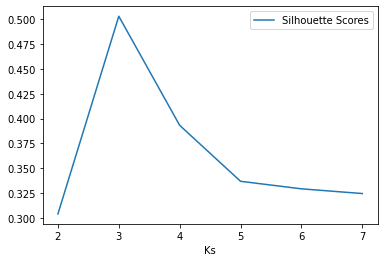

In [ ]:
# Iris Classification using complete-link
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# Load evaluation data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/iris.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:-1].astype(float)
X = MinMaxScaler().fit_transform(X)

silhouette_scores = []
ks = []
print('Normalized Data: YES\n')
for i in range(2,8):
  hac = HACClustering(k=i,link_type='complete',dist_type='euclidean')
  # Train on evaluation data using complete link
  hac.fit(X)
  # Print clusters
  hac.print_clusters(X)
  silhouette_scores.append(hac.silhouette_score)
  ks.append(i)
  print('------------------------------------------------------\n')

dictionary = {'Ks': ks, "Silhouette Scores": silhouette_scores}
df = pd.DataFrame(dictionary)

# Graph classification accuracy over k
df.plot(x ='Ks', y='Silhouette Scores', kind = 'line')

Discuss differences between single-link and complete-link

For HAC clustering with no labels in the input data, the single-link method had a higher maximum silhouette score of 0.6295 at k=2 compared to the maximum silhouette score of 0.5031 at k=3 for the complete-link method. Despite the single-link having a higher max silhouette score, the complete-link method captured the idea of there being 3 classifications because at k = 3 is where the max silhouette score happened for complete-link. The complete-link also had tighter range of values for silhouette score than the single-link. the complete-link's silhouette score range was ~0.5 to ~0.3 whereas the silhouette score range for single-link was ~0.6 to ~0.1.

## 2.1.2 (5%) Clustering the Iris Classification problem - HAC

Requirements:
- Repeat excercise 2.1.1 and include the output label as one of the input features.

Normalized Data: YES

Num clusters: 2

Silhouette score: 0.5989


centroid of cluster 0:
[0.1961,0.5908,0.0786,0.06  ,1.    ,0.    ,0.    ]
size of cluster: 50

centroid of cluster 1:
[0.545 ,0.3633,0.662 ,0.6567,0.    ,0.5   ,0.5   ]
size of cluster: 100

------------------------------------------------------

Num clusters: 3

Silhouette score: 0.8131


centroid of cluster 0:
[0.1961,0.5908,0.0786,0.06  ,1.    ,0.    ,0.    ]
size of cluster: 50

centroid of cluster 1:
[0.4544,0.3208,0.5525,0.5108,0.    ,1.    ,0.    ]
size of cluster: 50

centroid of cluster 2:
[0.6356,0.4058,0.7715,0.8025,0.    ,0.    ,1.    ]
size of cluster: 50

------------------------------------------------------

Num clusters: 4

Silhouette score: 0.6782


centroid of cluster 0:
[0.1961,0.5908,0.0786,0.06  ,1.    ,0.    ,0.    ]
size of cluster: 50

centroid of cluster 1:
[0.4544,0.3208,0.5525,0.5108,0.    ,1.    ,0.    ]
size of cluster: 50

centroid of cluster 2:
[0.6451,0.4099,0.7752,0.8053,0.    ,0.    ,1.

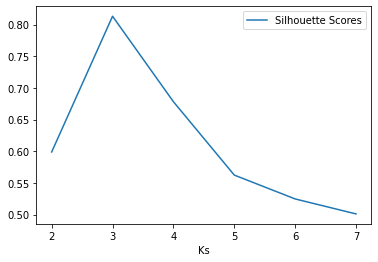

In [39]:
# Clustering Labels using single-link
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
# Load evaluation data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/iris.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:-1].astype(float)
X = MinMaxScaler().fit_transform(X)
y = np_arr[:,-1]
y = LabelEncoder().fit_transform(y)
y = np.reshape(y,(y.shape[0],1))
y = OneHotEncoder().fit_transform(y).toarray()

X_y = np.concatenate((X,y),axis=1)
silhouette_scores = []
ks = []
print('Normalized Data: YES\n')
for i in range(2,8):
  hac = HACClustering(k=i,link_type='single',dist_type='euclidean')
  # Train on evaluation data using single link
  hac.fit(X_y)
  # Print clusters
  hac.print_clusters(X_y)
  silhouette_scores.append(hac.silhouette_score)
  ks.append(i)
  print('------------------------------------------------------\n')

dictionary = {'Ks': ks, "Silhouette Scores": silhouette_scores}
df = pd.DataFrame(dictionary)

# Graph classification accuracy over k
df.plot(x ='Ks', y='Silhouette Scores', kind = 'line')

Normalized Data: YES

Num clusters: 2

Silhouette score: 0.5484


centroid of cluster 0:
[0.3253,0.4558,0.3156,0.2854,0.5   ,0.5   ,0.    ]
size of cluster: 100

centroid of cluster 1:
[0.6356,0.4058,0.7715,0.8025,0.    ,0.    ,1.    ]
size of cluster: 50

------------------------------------------------------

Num clusters: 3

Silhouette score: 0.8131


centroid of cluster 0:
[0.1961,0.5908,0.0786,0.06  ,1.    ,0.    ,0.    ]
size of cluster: 50

centroid of cluster 1:
[0.4544,0.3208,0.5525,0.5108,0.    ,1.    ,0.    ]
size of cluster: 50

centroid of cluster 2:
[0.6356,0.4058,0.7715,0.8025,0.    ,0.    ,1.    ]
size of cluster: 50

------------------------------------------------------

Num clusters: 4

Silhouette score: 0.6677


centroid of cluster 0:
[0.1961,0.5908,0.0786,0.06  ,1.    ,0.    ,0.    ]
size of cluster: 50

centroid of cluster 1:
[0.4544,0.3208,0.5525,0.5108,0.    ,1.    ,0.    ]
size of cluster: 50

centroid of cluster 2:
[0.7343,0.4708,0.8192,0.8611,0.    ,0.    ,1.

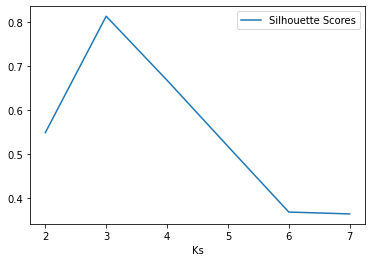

In [40]:
# Clustering Labels using complete-link
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# Load evaluation data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/iris.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:-1].astype(float)
X = MinMaxScaler().fit_transform(X)
y = np_arr[:,-1]
y = LabelEncoder().fit_transform(y)
y = np.reshape(y,(y.shape[0],1))
y = OneHotEncoder().fit_transform(y).toarray()

X_y = np.concatenate((X,y),axis=1)
silhouette_scores = []
ks = []
print('Normalized Data: YES\n')
for i in range(2,8):
  hac = HACClustering(k=i,link_type='complete',dist_type='euclidean')
  # Train on evaluation data using complete link
  hac.fit(X_y)
  # Print clusters
  hac.print_clusters(X_y)
  silhouette_scores.append(hac.silhouette_score)
  ks.append(i)
  print('------------------------------------------------------\n')

dictionary = {'Ks': ks, "Silhouette Scores": silhouette_scores}
df = pd.DataFrame(dictionary)

# Graph classification accuracy over k
df.plot(x ='Ks', y='Silhouette Scores', kind = 'line')

Discuss any differences between the results from 2.1.1 and 2.1.2.

For HAC clustering including the output labels, both single-link and complete-link performed similarly such that I don't believe that either method is better than the other for the Iris dataset. Both complete- and single-link methods had a max silhouette score of 0.8131 that ocurred at k=3. This seems appropriate based on the fact that there are only 3 classifications. the biggest differences between the two silhouette score trends is that the single-link method has a tighter range of values (0.81,0.5) than the complete-link method (0.81, 0.36). The other main differnce in silhouette score trend is that the falling limb of the complete-link graph is constant slope from k=3 to k=6 whereas the single-lin graph has more discontinuities from k=3 to k=6.

## 2.2.1 (7.5%) Clustering the Iris Classification problem: K-Means

Load the Iris Dataset [Iris Dataset](https://byu.instructure.com/courses/14142/files?preview=4421369)

Run K-Means on the Iris dataset using the output label as a feature and without using the output label as a feature

Requirements:
- State whether you normalize your data or not (your choice).  
- Show your results for clusterings using k = 2-7.  
- Graph the silhouette score for each k and discuss your results (i.e. what kind of clusters are being made).
---

Normalized Data: YES

Num clusters: 2

number of epochs/iterations to converge:  7
Silhouette score: 0.6295


centroid of cluster 0:
[0.545 ,0.3633,0.662 ,0.6567]
size of cluster: 100

centroid of cluster 1:
[0.1961,0.5908,0.0786,0.06  ]
size of cluster: 50

------------------------------------------------------

Num clusters: 3

number of epochs/iterations to converge:  5
Silhouette score: 0.5043


centroid of cluster 0:
[0.1961,0.5908,0.0786,0.06  ]
size of cluster: 50

centroid of cluster 1:
[0.4413,0.3074,0.5757,0.5492]
size of cluster: 61

centroid of cluster 2:
[0.7073,0.4509,0.797 ,0.8248]
size of cluster: 39

------------------------------------------------------

Num clusters: 4

number of epochs/iterations to converge:  13
Silhouette score: 0.4435


centroid of cluster 0:
[0.749 ,0.4769,0.8293,0.8673]
size of cluster: 27

centroid of cluster 1:
[0.5496,0.377 ,0.6626,0.6558]
size of cluster: 42

centroid of cluster 2:
[0.1961,0.5908,0.0786,0.06  ]
size of cluster: 50

centroid

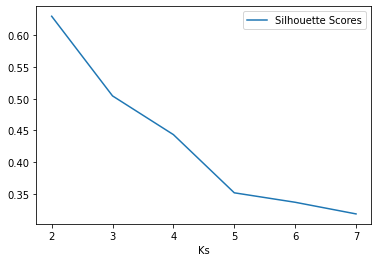

In [48]:
# Iris Classification without output label
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# Load evaluation data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/iris.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:-1].astype(float)
X = MinMaxScaler().fit_transform(X)

silhouette_scores = []
ks = []
print('Normalized Data: YES\n')
for i in range(2,8):
  k_means = KMEANSClustering(k=i,debug=False)
  # Train on evaluation data using complete link
  k_means.fit(X)
  # Print clusters
  k_means.print_clusters(X)
  silhouette_scores.append(k_means.silhouette_score)
  ks.append(i)
  print('------------------------------------------------------\n')

dictionary = {'Ks': ks, "Silhouette Scores": silhouette_scores}
df = pd.DataFrame(dictionary)

# Graph classification accuracy over k
df.plot(x ='Ks', y='Silhouette Scores', kind = 'line')

Normalized Data: YES

Num clusters: 2

number of epochs/iterations to converge:  1
Silhouette score: 0.5989


centroid of cluster 0:
[0.545 ,0.3633,0.662 ,0.6567,0.    ,0.5   ,0.5   ]
size of cluster: 100

centroid of cluster 1:
[0.1961,0.5908,0.0786,0.06  ,1.    ,0.    ,0.    ]
size of cluster: 50

------------------------------------------------------

Num clusters: 3

number of epochs/iterations to converge:  1
Silhouette score: 0.8131


centroid of cluster 0:
[0.1961,0.5908,0.0786,0.06  ,1.    ,0.    ,0.    ]
size of cluster: 50

centroid of cluster 1:
[0.4544,0.3208,0.5525,0.5108,0.    ,1.    ,0.    ]
size of cluster: 50

centroid of cluster 2:
[0.6356,0.4058,0.7715,0.8025,0.    ,0.    ,1.    ]
size of cluster: 50

------------------------------------------------------

Num clusters: 4

number of epochs/iterations to converge:  2
Silhouette score: 0.6709


centroid of cluster 0:
[0.1961,0.5908,0.0786,0.06  ,1.    ,0.    ,0.    ]
size of cluster: 50

centroid of cluster 1:
[0.4544,

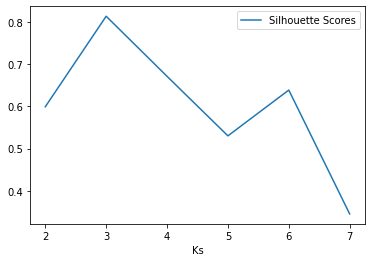

In [52]:
# Iris Classification with output label
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# Load evaluation data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/iris.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:-1].astype(float)
X = MinMaxScaler().fit_transform(X)
y = np_arr[:,-1]
y = LabelEncoder().fit_transform(y)
y = np.reshape(y,(y.shape[0],1))
y = OneHotEncoder().fit_transform(y).toarray()

X_y = np.concatenate((X,y),axis=1)
silhouette_scores = []
ks = []
print('Normalized Data: YES\n')
for i in range(2,8):
  k_means = KMEANSClustering(k=i,debug=False)
  # Train on evaluation data using complete link
  k_means.fit(X_y)
  # Print clusters
  k_means.print_clusters(X_y)
  silhouette_scores.append(k_means.silhouette_score)
  ks.append(i)
  print('------------------------------------------------------\n')

dictionary = {'Ks': ks, "Silhouette Scores": silhouette_scores}
df = pd.DataFrame(dictionary)

# Graph classification accuracy over k
df.plot(x ='Ks', y='Silhouette Scores', kind = 'line')

Compare results and differences between using the output label and excluding the output label

For Kmeans there was a significant difference between the results of the data that excluded the labels and the data that inlcuded the labels. As you can see in this graph above (for silhouette score with labels), the highest silhouette score occured at k = 3 and was 0.8131. This makes sense that the highest silhouette score for the dat with labels would ocurr at k = 3 because that is how many iris classifications there are. That silhouette score is also significantly greater than the silhouette score of 0.6295 when the data exlcuded the labels. It's also important to note that the silhouette score for the data with no labels  never increased, but the data that did include the labels did increase from k = 2 to k = 3. From the results of this analysis I think its safe to say that for the Iris dataset the data labels are an important input for k-means clustering.

## 2.2.2 (5%) Clustering the Iris Classification problem: K-Means

Requirements:
- Use the output label as an input feature
- Run K-Means 5 times with k=4, each time with different initial random centroids and discuss any variations in the results. 

Normalized Data: YES

Num clusters: 4

number of epochs/iterations to converge:  2
Silhouette score: 0.6673


centroid of cluster 0:
[0.2589,0.6949,0.0823,0.0774,1.    ,0.    ,0.    ]
size of cluster: 28

centroid of cluster 1:
[0.6356,0.4058,0.7715,0.8025,0.    ,0.    ,1.    ]
size of cluster: 50

centroid of cluster 2:
[0.1162,0.4583,0.074 ,0.0379,1.    ,0.    ,0.    ]
size of cluster: 22

centroid of cluster 3:
[0.4544,0.3208,0.5525,0.5108,0.    ,1.    ,0.    ]
size of cluster: 50

------------------------------------------------------

Num clusters: 4

number of epochs/iterations to converge:  2
Silhouette score: 0.6668


centroid of cluster 0:
[0.1961,0.5908,0.0786,0.06  ,1.    ,0.    ,0.    ]
size of cluster: 50

centroid of cluster 1:
[0.6356,0.4058,0.7715,0.8025,0.    ,0.    ,1.    ]
size of cluster: 50

centroid of cluster 2:
[0.5637,0.408 ,0.6102,0.5677,0.    ,1.    ,0.    ]
size of cluster: 24

centroid of cluster 3:
[0.3536,0.2404,0.4993,0.4583,0.    ,1.    ,0.    ]
size of

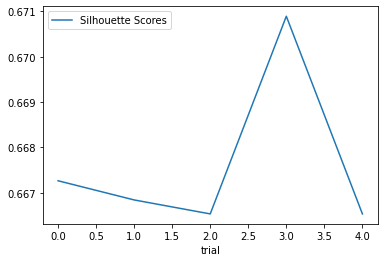

In [45]:
#K-Means 5 times

# Iris Classification with output label
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# Load evaluation data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/iris.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:-1].astype(float)
X = MinMaxScaler().fit_transform(X)
y = np_arr[:,-1]
y = LabelEncoder().fit_transform(y)
y = np.reshape(y,(y.shape[0],1))
y = OneHotEncoder().fit_transform(y).toarray()

X_y = np.concatenate((X,y),axis=1)
silhouette_scores = []
trials = []
print('Normalized Data: YES\n')
for i in range(5):
  k_means = KMEANSClustering(k=4,debug=False)
  # Train on evaluation data using complete link
  k_means.fit(X_y)
  # Print clusters
  k_means.print_clusters(X_y)
  silhouette_scores.append(k_means.silhouette_score)
  trials.append(i)
  print('------------------------------------------------------\n')

dictionary = {'trial': trials, "Silhouette Scores": silhouette_scores}
df = pd.DataFrame(dictionary)

# Graph classification accuracy over k
df.plot(x ='trial', y='Silhouette Scores', kind = 'line')

Discuss any variations in the results

Although the graph seems to show that there is significant variation in the silhouette score, the variation is actually minimal such that it is not significant for k=4 for 5 trials. from this limited analysis it would seem that there is little significance in variation between trials when parameters are kept constant and all that is changed is the initial centroids. Further analysis though could show that the variation between multiple trials is more significant. 

## 3.1 (12.5%) Run the SK versions of HAC (both single and complete link) on iris including the output label and compare your results with those above.
Use the silhouette score for this iris problem(k = 2-7).  You may write your own code to do silhouette (optional extra credit) or you can use sklearn.metrics.silhouette_score. Please state if you coded your own silhouette score function to receive the extra credit points (described below). Discuss how helpful Silhouette appeared to be for selecting which clustering is best. You do not need to supply full Silhouette graphs, but you could if you wanted to.

Requirements
- Use the Sillhouette score for this iris problem (k= 2-7) 
- Use at least one other scoring function from [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) and compare the results. State which metric was used. 
- Possible sklean metrics include (* metrics require ground truth labels):
    - adjusted_mutual_info_score*
    - adjusted_rand_score*
    - homogeneity_score*
    - completeness_score*
    - fowlkes_mallows_score*
    - calinski_harabasz_score
    - davies_bouldin_score
- Experiment using different hyper-parameters. Discuss Results

HAC Single-Link:

Normalized Data: YES

silhouette score for k=2:  0.5988612190229297
Calinski Harabasz score for k=2:  188.1314726727017
Davies Bouldin score for k=2:  0.6101314707989617
------------------------------------------------------

silhouette score for k=3:  0.8131378567546472
Calinski Harabasz score for k=3:  1253.4859733916735
Davies Bouldin score for k=3:  0.27570141291457895
------------------------------------------------------

silhouette score for k=4:  0.6782190567177897
Calinski Harabasz score for k=4:  866.913947975697
Davies Bouldin score for k=4:  0.3344961305381081
------------------------------------------------------

silhouette score for k=5:  0.5624025945863196
Calinski Harabasz score for k=5:  668.555249550202
Davies Bouldin score for k=5:  0.349175676677364
------------------------------------------------------

silhouette score for k=6:  0.5247366463547262
Calinski Harabasz score for k=6:  574.6389301642629
Davies Bouldin score for k=6:  0.39578089574147

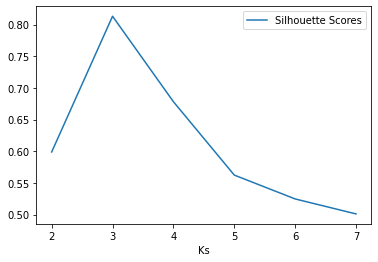

In [61]:
# Clustering Labels using single-link
from sklearn.cluster import AgglomerativeClustering
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Load evaluation data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/iris.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:-1].astype(float)
X = MinMaxScaler().fit_transform(X)
y = np_arr[:,-1]
y = LabelEncoder().fit_transform(y)
y = np.reshape(y,(y.shape[0],1))
y = OneHotEncoder().fit_transform(y).toarray()

X_y = np.concatenate((X,y),axis=1)
silhouette_scores = []
calinski_scores = []
davies_scores = []
ks = []
print('HAC Single-Link:\n')
print('Normalized Data: YES\n')
for i in range(2,8):
  hac = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='single')
  # Train on evaluation data using complete link
  hac.fit(X_y)
  labels = hac.fit_predict(X_y)
  # Print clusters
  sil_score = silhouette_score(X_y,labels)
  silhouette_scores.append(sil_score)

  cal_har_score = calinski_harabasz_score(X_y,labels)
  calinski_scores.append(cal_har_score)

  dav_bouldin_score = davies_bouldin_score(X_y,labels)
  davies_scores.append(dav_bouldin_score)

  ks.append(i)
  print(f'silhouette score for k={i}: ',sil_score)
  print(f'Calinski Harabasz score for k={i}: ',cal_har_score)
  print(f'Davies Bouldin score for k={i}: ',dav_bouldin_score)
  print('------------------------------------------------------\n')

dictionary = {'Ks': ks, "Silhouette Scores": silhouette_scores}
df = pd.DataFrame(dictionary)

# Graph classification accuracy over k
df.plot(x ='Ks', y='Silhouette Scores', kind = 'line')

HAC Complete-Link:

Normalized Data: YES

silhouette score for k=2:  0.548424623848271
Calinski Harabasz score for k=2:  142.10076499535612
Davies Bouldin score for k=2:  0.7386654758385804
------------------------------------------------------

silhouette score for k=3:  0.8131378567546472
Calinski Harabasz score for k=3:  1253.4859733916735
Davies Bouldin score for k=3:  0.27570141291457895
------------------------------------------------------

silhouette score for k=4:  0.667672547354018
Calinski Harabasz score for k=4:  1034.433466253868
Davies Bouldin score for k=4:  0.6322806795898261
------------------------------------------------------

silhouette score for k=5:  0.5174620340158975
Calinski Harabasz score for k=5:  904.2881739107004
Davies Bouldin score for k=5:  0.7775745106793144
------------------------------------------------------

silhouette score for k=6:  0.36802009118319245
Calinski Harabasz score for k=6:  913.589648484823
Davies Bouldin score for k=6:  0.9281047009

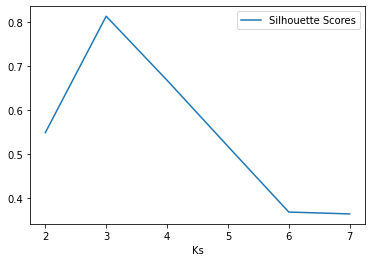

In [62]:
# Clustering Labels using single-link
from sklearn.cluster import AgglomerativeClustering
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Load evaluation data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/iris.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:-1].astype(float)
X = MinMaxScaler().fit_transform(X)
y = np_arr[:,-1]
y = LabelEncoder().fit_transform(y)
y = np.reshape(y,(y.shape[0],1))
y = OneHotEncoder().fit_transform(y).toarray()

X_y = np.concatenate((X,y),axis=1)
silhouette_scores = []
calinski_scores = []
davies_scores = []
ks = []
print('HAC Complete-Link:\n')
print('Normalized Data: YES\n')
for i in range(2,8):
  hac = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='complete')
  # Train on evaluation data using complete link
  hac.fit(X_y)
  labels = hac.fit_predict(X_y)
  # Print clusters
  sil_score = silhouette_score(X_y,labels)
  silhouette_scores.append(sil_score)

  cal_har_score = calinski_harabasz_score(X_y,labels)
  calinski_scores.append(cal_har_score)

  dav_bouldin_score = davies_bouldin_score(X_y,labels)
  davies_scores.append(dav_bouldin_score)

  ks.append(i)
  print(f'silhouette score for k={i}: ',sil_score)
  print(f'Calinski Harabasz score for k={i}: ',cal_har_score)
  print(f'Davies Bouldin score for k={i}: ',dav_bouldin_score)
  print('------------------------------------------------------\n')

dictionary = {'Ks': ks, "Silhouette Scores": silhouette_scores}
df = pd.DataFrame(dictionary)

# Graph classification accuracy over k
df.plot(x ='Ks', y='Silhouette Scores', kind = 'line')

*Record impressions*

All three of the metrics that I used were useful in identifying the best clustering. For both single- and complete-link, the silhouette score at k=3 was 0.8131, the Calinski Harabasz score for k=3 was 1253, and the Davies Bouldin score for k=3 was 0.2757. This silhouette score and calinski harabasz score were the maximums for all values of k, and the davies bouldin score was the minimum score for all values of k. Because these scores were either maximums or a minimum, they were effective in identifying k=3 as the best number of clusters.

## 3.2 (12.5%) Run the SK version of k-means on iris including the output label and compare your results with those above. 

Use the silhouette score for this iris problem(k = 2-7). You may write your own code to do silhouette (optional extra credit) or you can use sklearn.metrics.silhouette_score. Please state if you coded your own silhouette score function to receive the extra credit points (described below). Discuss how helpful Silhouette appeared to be for selecting which clustering is best. You do not need to supply full Silhouette graphs, but you could if you wanted to.

Requirements
- Use the Sillhouette score for this iris problem (k= 2-7) 
- Use at least one other scoring function form sklearn.metrics and compare the results. State which metric was used
- Experiment different hyper-parameters. Discuss Results

KMeans:

Normalized Data: YES

silhouette score for k=2:  0.5988612190229297
Calinski Harabasz score for k=2:  188.1314726727017
Davies Bouldin score for k=2:  0.6101314707989617
------------------------------------------------------

silhouette score for k=3:  0.8131378567546472
Calinski Harabasz score for k=3:  1253.4859733916735
Davies Bouldin score for k=3:  0.27570141291457895
------------------------------------------------------

silhouette score for k=4:  0.670893568212392
Calinski Harabasz score for k=4:  1041.501336721045
Davies Bouldin score for k=4:  0.6379942600566665
------------------------------------------------------

silhouette score for k=5:  0.5281203266089715
Calinski Harabasz score for k=5:  967.5329252407487
Davies Bouldin score for k=5:  0.8327494220744358
------------------------------------------------------

silhouette score for k=6:  0.3827958016015561
Calinski Harabasz score for k=6:  952.4237831034374
Davies Bouldin score for k=6:  0.9312331745363597
----

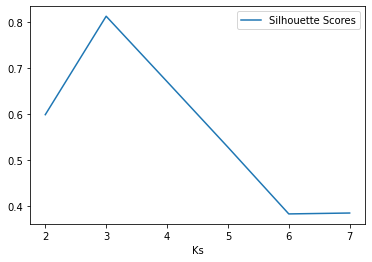

In [64]:
# Load sklearn 
from sklearn.cluster import KMeans
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Load evaluation data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/iris.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:-1].astype(float)
X = MinMaxScaler().fit_transform(X)
y = np_arr[:,-1]
y = LabelEncoder().fit_transform(y)
y = np.reshape(y,(y.shape[0],1))
y = OneHotEncoder().fit_transform(y).toarray()

X_y = np.concatenate((X,y),axis=1)
silhouette_scores = []
calinski_scores = []
davies_scores = []
ks = []
print('KMeans:\n')
print('Normalized Data: YES\n')
for i in range(2,8):
  k_means = KMeans(n_clusters=i)
  # Train on evaluation data using complete link
  k_means.fit(X_y)
  labels = k_means.fit_predict(X_y)
  # Print clusters
  sil_score = silhouette_score(X_y,labels)
  silhouette_scores.append(sil_score)

  cal_har_score = calinski_harabasz_score(X_y,labels)
  calinski_scores.append(cal_har_score)

  dav_bouldin_score = davies_bouldin_score(X_y,labels)
  davies_scores.append(dav_bouldin_score)

  ks.append(i)
  print(f'silhouette score for k={i}: ',sil_score)
  print(f'Calinski Harabasz score for k={i}: ',cal_har_score)
  print(f'Davies Bouldin score for k={i}: ',dav_bouldin_score)
  print('------------------------------------------------------\n')

dictionary = {'Ks': ks, "Silhouette Scores": silhouette_scores}
df = pd.DataFrame(dictionary)

# Graph classification accuracy over k
df.plot(x ='Ks', y='Silhouette Scores', kind = 'line')


*Record impressions*

The results of Kmeans were similar to that of HAC. In fact,the silhouette score, Calinski Harabasz score, and the Davies Bouldin score for k=3 were the exact same as those of HAC above: 0.8131, 1253, and 0.2757 respectively. As with HAC, I believe that all three of these metrics were effective in determining the best number of clusters for the dataset because silhouette score and calinski harabasz score were at there max at k=3, and the davies bouldin score was at a minimum at k=3. 

## 4. (Optional 5% extra credit) For your silhouette experiment above, write and use your own code to calculate the silhouette scores, rather than the SK or other version. 


*Show findings here*

In [ ]:
# Copy function Below